<a href="https://colab.research.google.com/github/chrisnish4/msds610_hashtable/blob/main/hash_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from google.colab import files

# Getting the data


In [ ]:
! conda install -c conda-forge kaggle

/bin/bash: line 1: conda: command not found


In [ ]:
uploaded = files.upload()
path = '/root/.kaggle'
os.makedirs(path, exist_ok=True)
os.rename(list(uploaded.keys())[0], '/root/.kaggle/kaggle.json')
os.chmod("/root/.kaggle/kaggle.json", 600)

Saving kaggle.json to kaggle.json


In [ ]:
! kaggle datasets download -d syuzai/perth-house-prices

  0% 0.00/1.86M [00:00<?, ?B/s]
100% 1.86M/1.86M [00:00<00:00, 39.9MB/s]


In [ ]:
! unzip ./perth-house-prices

Archive:  ./perth-house-prices.zip
  inflating: all_perth_310121.csv    


# Data

In [ ]:
file = ! ls *.csv
data = pd.read_csv(file[0])

In [40]:
relevant = data[['ADDRESS', 'PRICE']]
relevant.head()

,ADDRESS,PRICE
0,1 Acorn Place,565000
1,1 Addis Way,365000
2,1 Ainsley Court,287000
3,1 Albert Street,255000
4,1 Aman Place,325000


In [41]:
relevant.shape

(33656, 2)

In [ ]:
search_term = '9C Gold Street'
search_term

'9C Gold Street'

# Linear search

In [ ]:
linear_search = list()
for i in range(len(relevant)):
  row = relevant.iloc[i]
  address = row.ADDRESS
  price = row.PRICE

  linear_search.append((address, price))

In [ ]:
%%timeit -n 100 -r 100
for pair in linear_search:
  if pair[0] == search_term:
    pair

2.74 ms ± 842 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


# Hash table (50 buckets)

In [ ]:
def hashcode(address):
  h = 0
  for i in address:
    h = h*31 + ord(i)
  return h

In [ ]:
search_hc = hashcode(search_term)
search_hc

1445447840029701104589

In [ ]:
def get_bucket_num(hashcode, buckets):
  num = hashcode % buckets

  return num

In [ ]:
"""Initializing hash table with 50 buckets"""
htable_50 = list()
for i in range(50):
  htable_50.append(list())

In [ ]:
"""Iterating through data frame and inserting into hash table"""
for i in range(len(relevant)):
  address = relevant.iloc[i].ADDRESS
  price = relevant.iloc[i].PRICE

  hcode = hashcode(address)
  bucket_num = hcode % 50
  tup = address, price
  htable_50[bucket_num].append(tup)

In [42]:
search_hash = hashcode(search_term)
search_bucket_num = get_bucket_num(search_hash, 50)
search_bucket = htable_50[search_bucket_num]
for pair in search_bucket:
  if pair[0] == search_term:
    print(pair)

('9C Gold Street', 1040000)


In [ ]:
%%timeit -n 100 -r 100
"""Running an equality search in the hash table"""
search_hash = hashcode(search_term)
search_bucket_num = get_bucket_num(search_hash, 50)
search_bucket = htable_50[search_bucket_num]
for pair in search_bucket:
  if pair[0] == search_term:
    pair

53.2 µs ± 10.6 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


# Hash table (4011 buckets)

In [ ]:
"""Initializing hash tablewith 4011 buckets"""
htable_4011 = list()
for i in range(4011):
  htable_4011.append(list())

In [ ]:
"""Iterating through data frame and inserting into hash table"""
for i in range(len(relevant)):
  address = relevant.iloc[i].ADDRESS
  price = relevant.iloc[i].PRICE

  hcode = hashcode(address)
  bucket_num = hcode % 4011
  tup = address, price
  htable_4011[bucket_num].append(tup)

In [ ]:
%%timeit -n 100 -r 100
"""Running an equality search in the hash table"""
search_hash = hashcode(search_term)
search_bucket_num = get_bucket_num(search_hash, 4011)
search_bucket = htable_4011[search_bucket_num]
for pair in search_bucket:
  if pair[0] == search_term:
    pair

The slowest run took 16.94 times longer than the fastest. This could mean that an intermediate result is being cached.
6.41 µs ± 6.8 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


# Non-demo things

##Prime

In [ ]:
"""Initializing hash tablewith 4011 buckets"""
htable_3989 = list()
for i in range(1117):
  htable_3989.append(list())

In [ ]:
for i in range(len(relevant)):
  address = relevant.iloc[i].ADDRESS
  price = relevant.iloc[i].PRICE

  hcode = hashcode(address)
  bucket_num = hcode % 1117
  tup = address, price
  htable_3989[bucket_num].append(tup)

In [ ]:
bucket_lens_3989 = list()
for i in range(1117):
  bucket_lens_3989.append(len(htable_3989[i]))
  #bucket_avg_4011 = bucket_lens_4011/4011

<BarContainer object of 1117 artists>

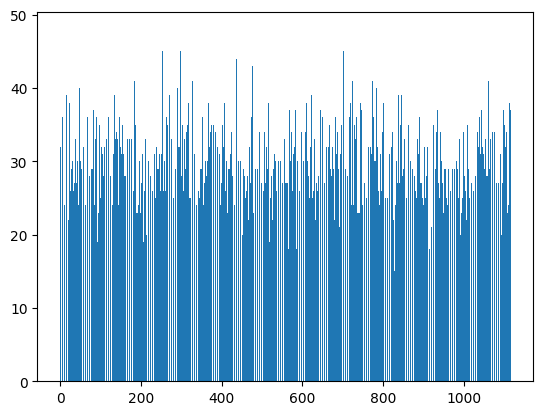

In [ ]:
buckets_prime = range(1117)
plt.bar(buckets_prime, bucket_lens_3989)

## Plotting

In [ ]:
searches = ['linear', 'hash_50', 'hash_4011']
times = [1440, 45.3, 2.12]

Text(2, 100, '2.12 µs ± 434 ns \nper loop')

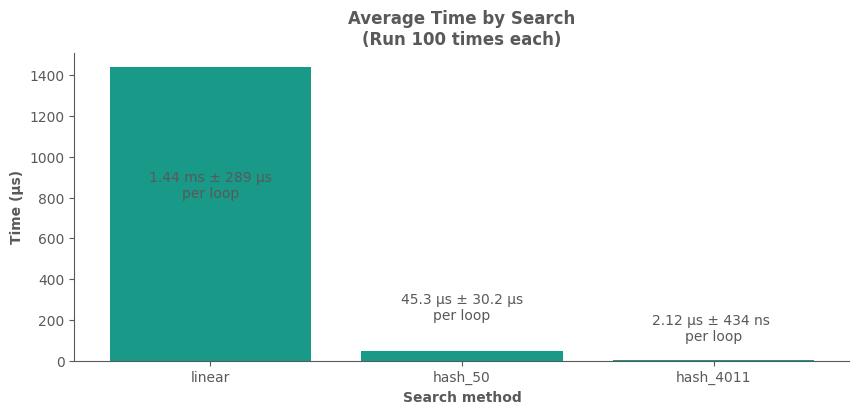

In [ ]:
fig, axs = plt.subplots(figsize=(10,4))
axs.bar(searches, times, color='#199988')
axs.set_title('Average Time by Search\n(Run 100 times each)', color='#595959', weight='bold')
axs.set_xlabel('Search method', color='#595959', weight='bold')
axs.set_ylabel('Time (µs)', color='#595959', weight='bold')
axs.spines[['right', 'top']].set_visible(False)
axs.spines[['bottom', 'left']].set_color('#595959')

axs.tick_params(axis='x', colors='#595959')
axs.tick_params(axis='y', colors='#595959')

axs.text(0, 800, '1.44 ms ± 289 µs\nper loop', horizontalalignment='center', color='#595959')
axs.text(1, 200, '45.3 µs ± 30.2 µs\nper loop', horizontalalignment='center', color='#595959')
axs.text(2, 100, '2.12 µs ± 434 ns \nper loop', horizontalalignment='center', color='#595959')

#plt.savefig('search_times.png')

## Small tests

In [ ]:
short = relevant.iloc[16828:]

In [ ]:
linear_search_short = list()
for i in range(len(short)):
  row = short.iloc[i]
  address = row.ADDRESS
  price = row.PRICE

  linear_search_short.append((address, price))

In [ ]:
%%timeit -n 100 -r 100
for pair in linear_search_short:
  if pair[0] == search_term:
    pair

1.45 ms ± 567 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [ ]:
"""Initializing hash table with 50 buckets"""
htable_50_short = list()
for i in range(50):
  htable_50_short.append(list())

In [ ]:
"""Iterating through data frame and inserting into hash table"""
for i in range(len(short)):
  address = short.iloc[i].ADDRESS
  price = short.iloc[i].PRICE

  hcode = hashcode(address)
  bucket_num = hcode % 50
  tup = address, price
  htable_50_short[bucket_num].append(tup)

In [ ]:
%%timeit -n 100 -r 100
"""Running an equality search in the hash table"""
search_hash = hashcode(search_term)
search_bucket_num = get_bucket_num(search_hash, 50)
search_bucket = htable_50_short[search_bucket_num]
for pair in search_bucket:
  if pair[0] == search_term:
    pair

53.6 µs ± 6.74 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [ ]:
"""Initializing hash tablewith 4011 buckets"""
htable_4011_short = list()
for i in range(4011):
  htable_4011_short.append(list())

In [ ]:
"""Iterating through data frame and inserting into hash table"""
for i in range(len(short)):
  address = short.iloc[i].ADDRESS
  price = short.iloc[i].PRICE

  hcode = hashcode(address)
  bucket_num = hcode % 4011
  tup = address, price
  htable_4011_short[bucket_num].append(tup)

In [ ]:
%%timeit -n 100 -r 100
"""Running an equality search in the hash table"""
search_hash = hashcode(search_term)
search_bucket_num = get_bucket_num(search_hash, 4011)
search_bucket = htable_4011_short[search_bucket_num]
for pair in search_bucket:
  if pair[0] == search_term:
    pair

The slowest run took 14.74 times longer than the fastest. This could mean that an intermediate result is being cached.
6.96 µs ± 9.27 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


## Other

In [ ]:
bucket_lens = list()
for i in range(50):
  bucket_lens.append(len(htable_50[i]))

<BarContainer object of 50 artists>

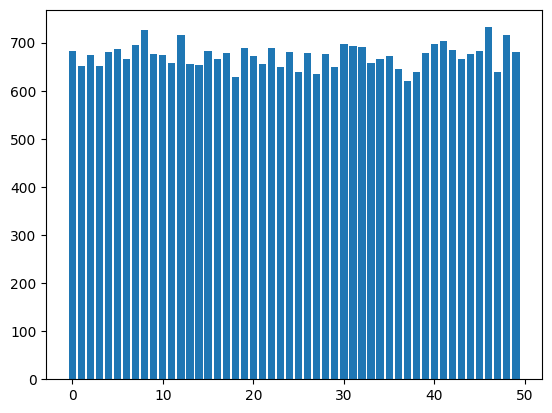

In [ ]:
buckets_50 = range(50)
plt.bar(buckets_50, bucket_lens)

In [ ]:
bucket_lens_4011 = list()
for i in range(4011):
  bucket_lens_4011.append(len(htable_4011[i]))
  #bucket_avg_4011 = bucket_lens_4011/4011

<BarContainer object of 4011 artists>

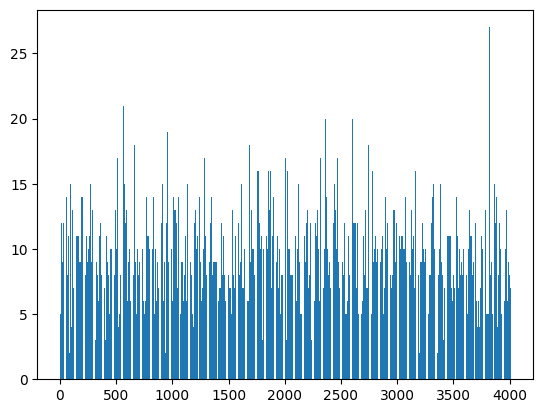

In [ ]:
buckets_4011 = range(4011)
plt.bar(buckets_4011, bucket_lens_4011)

In [ ]:
get_bucket_num(search_hc, 50)

39

In [ ]:
get_bucket_num(search_hc, 4011)

2358